# Introduction to Machine Learning – Titanic Dataset

This notebook introduces basic supervised learning with:
- Preprocessing (missing values, encoding)
- Feature scaling
- Pipeline creation with Scikit-learn
- Model training & evaluation
- Model saving and serving with FastAPI

In [31]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, cross_val_score
import joblib

In [32]:
# 📥 Load Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# 🧹 Select Features and Target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = df[features]
y = df[target]

In [34]:
# 🔧 Define Preprocessing Pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [35]:
# 🔁 Full Pipeline with Model
clf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = clf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Save the Trained Pipeline

In [36]:
joblib.dump(clf_pipeline, "titanic_pipeline.pkl")

['titanic_pipeline.pkl']

## Exercise 1: Try a Different Classifier
Replace the logistic regression model in the pipeline with another classifier, such as `RandomForestClassifier`, and compare the results.

```python
from sklearn.ensemble import RandomForestClassifier
# Replace the classifier in clf_pipeline
```

*What changes do you observe in precision and recall?*

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create Pipeline with RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the Random Forest model
print("Training Random Forest Classifier...")
rf_pipeline.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_pipeline.predict(X_test)

# Compare Results
print("Logistic Regression vs Random Forest")

print("\n Logistic Regression results:")
print(classification_report(y_test, y_pred))

print("\n Random Forest results:")

print(classification_report(y_test, rf_y_pred))

# Save the Random Forest model
joblib.dump(rf_pipeline, "titanic_rf_pipeline1.pkl")
print(f"\n💾 Random Forest model saved as 'titanic_rf_pipeline.pkl'")

Training Random Forest Classifier...
Logistic Regression vs Random Forest

 Logistic Regression results:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


 Random Forest results:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179


💾 Random Forest model saved as 'titanic_rf_pipeline.pkl'


## Exercise 2: Use Cross-Validation
Apply cross-validation on the pipeline instead of a single train/test split.

```python
from sklearn.model_selection import cross_val_score
```

*Is the model stable across folds?*

Performing 5-fold cross-validation...

 Cross Validation Results:
mean: 0.7890088506685079
 std: 0.01478455309457623
 min: 0.7696629213483146
 max: 0.8089887640449438
mean: 0.7398776931721306
 std: 0.021276123291098722
 min: 0.7101449275362319
 max: 0.765625
mean: 0.6957800511508953
 std: 0.046667035766478134
 min: 0.6029411764705882
 max: 0.7246376811594203
mean: 0.7160977168276439
 std: 0.027367779550814396
 min: 0.6666666666666666
 max: 0.7424242424242424
mean: 0.8081099742640134
 std: 0.02142893650479516
 min: 0.7821229050279329
 max: 0.8426966292134831
mean: 0.7591325210689899
 std: 0.02622682261060496
 min: 0.7142857142857143
 max: 0.7941176470588235
mean: 0.7337595907928389
 std: 0.05662624596756022
 min: 0.6470588235294118
 max: 0.7971014492753623
mean: 0.7450028844590675
 std: 0.033984976751933675
 min: 0.704
 max: 0.7941176470588235

 Logistic Regression:
  Accuracy    : CV = 0.019 - Very Stable
  Precision   : CV = 0.029 - Very Stable
  Recall      : CV = 0.067 - Stable 
  F

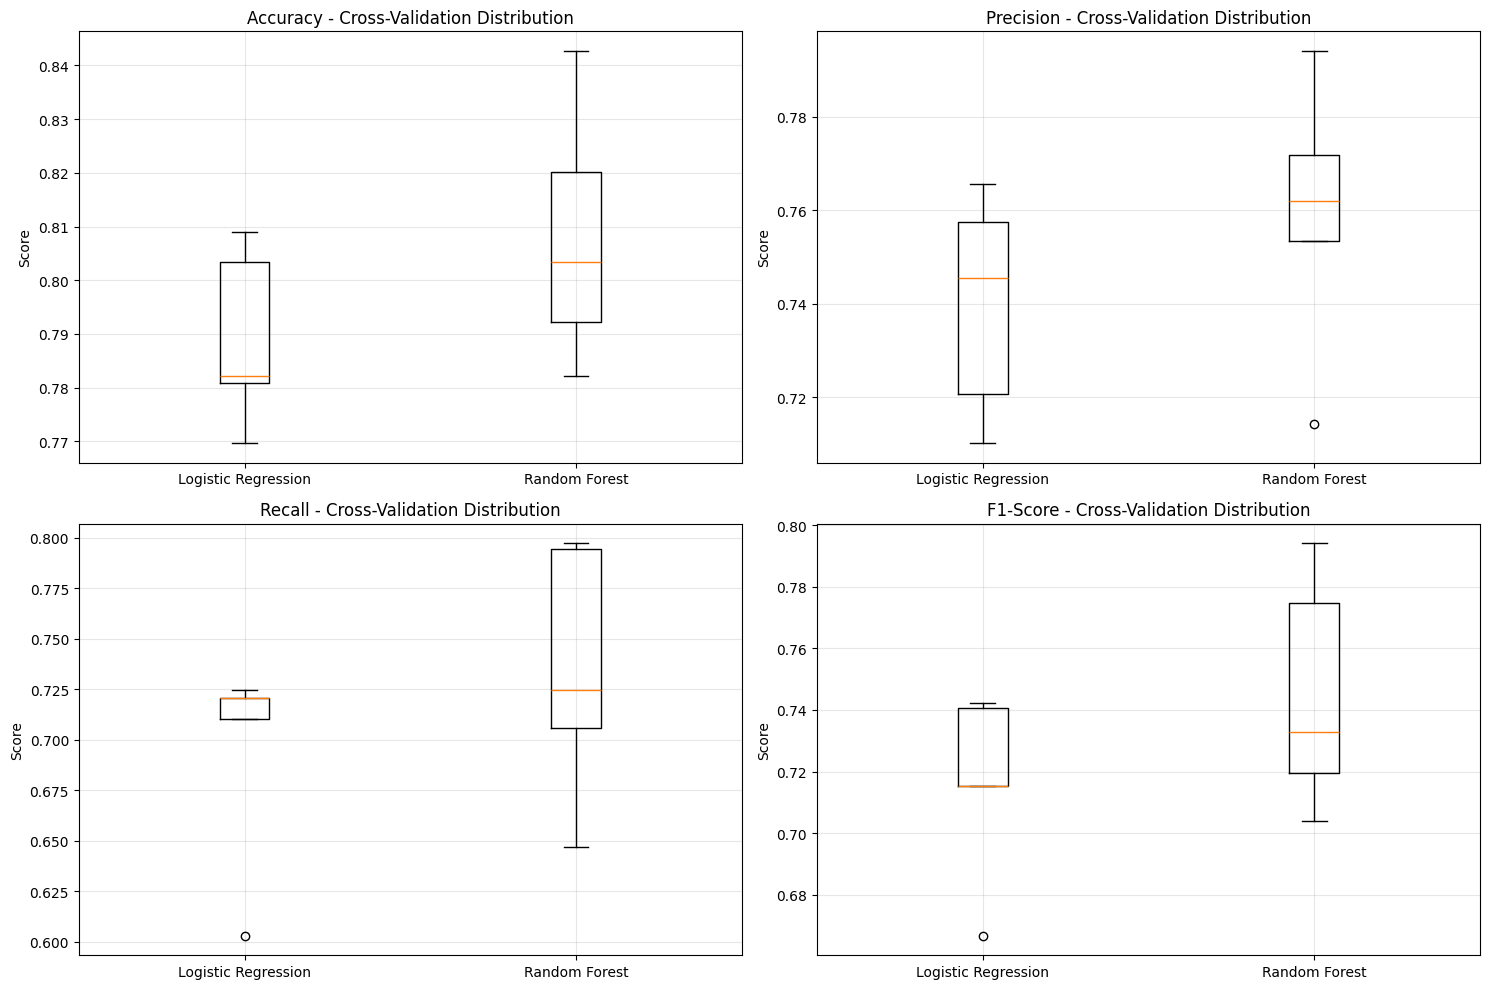

In [38]:
# Apply cross-validation to both models
print("Performing 5-fold cross-validation...")

# Logistic Regression Cross-Validation
lr_cv_scores = cross_validate(clf_pipeline, X, y, cv=5,
                             scoring=['accuracy', 'precision', 'recall', 'f1'],
                             return_train_score=True)

# Random Forest Cross-Validation
rf_cv_scores = cross_validate(rf_pipeline, X, y, cv=5,
                             scoring=['accuracy', 'precision', 'recall', 'f1'],
                             return_train_score=True)

# Create comprehensive results
print("\n Cross Validation Results:")

for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    scores = lr_cv_scores[metric]
    print(f"mean: {np.mean(scores)}\n std: {np.std(scores)}\n min: {np.min(scores)}\n max: {np.max(scores)}")

for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    scores = rf_cv_scores[metric]
    print(f"mean: {np.mean(scores)}\n std: {np.std(scores)}\n min: {np.min(scores)}\n max: {np.max(scores)}")

# Stability Analysis

print("\n Logistic Regression:")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    scores = lr_cv_scores[metric]
    coefficient_of_variation = np.std(scores) / np.mean(scores)

    if coefficient_of_variation < 0.05:
        stability = "Very Stable"
    elif coefficient_of_variation < 0.10:
        stability = "Stable "
    else:
        stability = "Unstable "

    print(f"  {metric.replace('test_', '').capitalize():12}: CV = {coefficient_of_variation:.3f} - {stability}")

print("\n Random Forest:")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    scores = rf_cv_scores[metric]
    coefficient_of_variation = np.std(scores) / np.mean(scores)

    if coefficient_of_variation < 0.05:
        stability = "Very Stable"
    elif coefficient_of_variation < 0.10:
        stability = "Stable "
    else:
        stability = "Unstable "

    print(f"  {metric.replace('test_', '').capitalize():12}: CV = {coefficient_of_variation:.3f} - {stability}")

# Visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//2, i%2]

    # Box plots for each model
    lr_scores = lr_cv_scores[metric]
    rf_scores = rf_cv_scores[metric]

    ax.boxplot([lr_scores, rf_scores], tick_labels=['Logistic Regression', 'Random Forest'])
    ax.set_title(f'{name} - Cross-Validation Distribution')
    ax.set_ylabel('Score')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercise 3: Add Feature Engineering
Add a new column to the Titanic data, such as `FamilySize = SibSp + Parch`, and evaluate if this feature improves the model.

```python
df['FamilySize'] = df['SibSp'] + df['Parch']
# Then include it in the feature list and re-run the pipeline
```

*Does the new feature improve the prediction metrics?*

In [43]:
# Create enhanced dataset with new features
df_enhanced = df.copy()

# 1. FamilySize feature
df_enhanced['FamilySize'] = df_enhanced['SibSp'] + df_enhanced['Parch']

# Enhanced feature set
enhanced_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']

X_enhanced = df_enhanced[enhanced_features]
y_enhanced = df_enhanced[target]

# Updated preprocessing for enhanced features
numeric_features_enhanced = ['Age', 'Fare', 'FamilySize']
categorical_features_enhanced = ['Pclass', 'Sex', 'Embarked']

numeric_transformer_enhanced = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_enhanced = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_enhanced = ColumnTransformer([
    ('num', numeric_transformer_enhanced, numeric_features_enhanced),
    ('cat', categorical_transformer_enhanced, categorical_features_enhanced)
])

# Enhanced models
enhanced_lr_pipeline = Pipeline([
    ('preprocessing', preprocessor_enhanced),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

enhanced_rf_pipeline = Pipeline([
    ('preprocessing', preprocessor_enhanced),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Compare enhanced vs original models
print("\n FEATURE ENGINEERING IMPACT:")

# Original model performance (using cross-validation)
original_lr_cv = cross_val_score(clf_pipeline, X, y, cv=5, scoring='f1')
original_rf_cv = cross_val_score(rf_pipeline, X, y, cv=5, scoring='f1')

# Enhanced model performance
enhanced_lr_cv = cross_val_score(enhanced_lr_pipeline, X_enhanced, y_enhanced, cv=5, scoring='f1')
enhanced_rf_cv = cross_val_score(enhanced_rf_pipeline, X_enhanced, y_enhanced, cv=5, scoring='f1')

# Results comparison
results_comparison = pd.DataFrame({
    'Original Features': [np.mean(original_lr_cv), np.mean(original_rf_cv)],
    'Enhanced Features': [np.mean(enhanced_lr_cv), np.mean(enhanced_rf_cv)],
    'Improvement': [np.mean(enhanced_lr_cv) - np.mean(original_lr_cv),
                   np.mean(enhanced_rf_cv) - np.mean(original_rf_cv)]
}, index=['Logistic Regression', 'Random Forest'])

print("F1-Score Comparison (5-fold CV):")
print(results_comparison.round(4))


 FEATURE ENGINEERING IMPACT:
F1-Score Comparison (5-fold CV):
                     Original Features  Enhanced Features  Improvement
Logistic Regression             0.7161             0.7217       0.0056
Random Forest                   0.7450             0.7383      -0.0067


## Exercise 4 (Bonus): Create a Streamlit Interface
Build a simple Streamlit UI to load the trained model and predict survival based on user input.

```python
# Example streamlit interface
import streamlit as st
import joblib
import pandas as pd

model = joblib.load("titanic_pipeline.pkl")
Pclass = st.selectbox("Pclass", [1, 2, 3])
Sex = st.selectbox("Sex", ["male", "female"])
Age = st.slider("Age", 0, 100, 25)
Fare = st.slider("Fare", 0.0, 500.0, 32.0)
Embarked = st.selectbox("Embarked", ["S", "C", "Q"])

if st.button("Predict"):
    X_new = pd.DataFrame([[Pclass, Sex, Age, Fare, Embarked]],
                         columns=["Pclass", "Sex", "Age", "Fare", "Embarked"])
    pred = model.predict(X_new)
    st.write("Prediction:", "Survived" if pred[0] == 1 else "Did not survive")
```

👉 *Try running your Streamlit app locally.*